## Importing necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset 

In [3]:
df = pd.read_excel("02 Churn-Dataset.xlsx")

### PEEKING INTO THE DATASET...

In [50]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No


### THE PROPORTION OF PEOPLE THAT CHURNED TO THOSE THAT DIDN'T 

In [51]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### DATA EXPLORATION

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### They are 7043 observations; 23 feautures

In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


#### SUMMARIZING THE WHOLE DATASET TO UNDERSTAND THE FEATURES BETTER,LOCATE THE MISPLACED  DATA TYPES AND EXPLORING AND UNDERSTANDING THE UNIQUE VALUES DISTRIBUTION.

In [55]:
# Summarize our dataset 
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
#print ("\nUnique values :  \n",df.nunique())
for item in df.columns:
    print(item,"||",'Type: ', df[item].dtypes,"|| " ,df[item].nunique()," unique values")
    print (df[item].unique())
    print('*' * 20)

Rows     :  7043
Columns  :  23

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets', 'Churn']

Missing values :   0
customerID || Type:  object ||  7043  unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
********************
gender || Type:  object ||  2  unique values
['Female' 'Male']
********************
SeniorCitizen || Type:  int64 ||  2  unique values
[0 1]
********************
Partner || Type:  object ||  2  unique values
['Yes' 'No']
********************
Dependents || Type:  object ||  2  unique values
['No' 'Yes']
********************
tenure || Type:  int64 ||  73  unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 

### It is observed above that total charges is wrongly labelled as an object, to correct to, i convert it into a number

In [57]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [58]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

### Converting the values into lower string character

In [120]:
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")
df.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert
numAdminTickets couldn't convert
numTechTickets couldn't convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,month-to-month,yes,electronic check,29.85,NaN,0,0,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,no,no,one year,no,mailed check,56.95,NaN,0,0,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,month-to-month,yes,mailed check,53.85,NaN,0,0,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,no,no,one year,no,bank transfer (automatic),42.30,NaN,0,3,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,month-to-month,yes,electronic check,70.70,NaN,0,0,yes


In [4]:
# Check for missing data and duplicated customer_IDs
df.isna().any().any(), df.customerID.duplicated().any()

(False, False)

#### With the piece of code above, we are certain they are no missing data and also no duplicated data

In [67]:
#making a copy of dataset so as to preserve the original data
df2= df.copy()

## Made a crosstab to reflect the number and percentage of customers that churned in respect to the freautures that are in the dataset

In [72]:
df2.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
#churn_df_copy.head()
summary = pd.concat([pd.crosstab(df2[x], df2.Churn) for x in df2.columns[:-1]], keys=df2.columns[:-1])
summary['Churn_Percentage'] = summary['yes'] / (summary['no'] + summary['yes'])
summary

Churn                                         no   yes  Churn_Percentage
gender           female                     2549   939          0.269209
                 male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          no                         2441  1200          0.329580
                 yes                        2733   669          0.196649
Dependents       no                         3390  1543          0.312791
                 yes                        1784   326          0.154502
PhoneService     no                          512   170          0.249267
                 yes                        4662  1699          0.267096
MultipleLines    no                         2541   849          0.250442
                 no phone service            512   170          0.249267
                 yes                        2121   850          0.286099
InternetService  dsl                        1962   459          0.189591
                 fiber optic                1799  1297          0.418928
                 no                         1413   113          0.074050
OnlineSecurity   no                         2037  1461          0.417667
                 no internet service        1413   113          0.074050
                 yes                        1724   295          0.146112
OnlineBackup     no                         1855  1233          0.399288
                 no internet service        1413   113          0.074050
                 yes                        1906   523          0.215315
DeviceProtection no                         1884  1211          0.391276
                 no internet service        1413   113          0.074050
                 yes                        1877   545          0.225021
TechSupport      no                         2027  1446          0.416355
                 no internet service        1413   113          0.074050
                 yes                        1734   310          0.151663
StreamingTV      no                         1868   942          0.335231
                 no internet service        1413   113          0.074050
                 yes                        1893   814          0.300702
StreamingMovies  no                         1847   938          0.336804
                 no internet service        1413   113          0.074050
                 yes                        1914   818          0.299414
Contract         month-to-month             2220  1655          0.427097
                 one year                   1307   166          0.112695
                 two year                   1647    48          0.028319
PaperlessBilling no                         2403   469          0.163301
                 yes                        2771  1400          0.335651
PaymentMethod    bank transfer (automatic)  1286   258          0.167098
                 credit card (automatic)    1290   232          0.152431
                 electronic check           1294  1071          0.452854
                 mailed check               1304   308          0.191067
numAdminTickets  0                          4261  1581          0.270626
                 1                           176    47          0.210762
                 2                           181    62          0.255144
                 3                           195    67          0.255725
                 4                           181    47          0.206140
                 5                           180    65          0.265306
numTechTickets   0                          4877  1196          0.196937
                 1                            88   168          0.656250
                 2                            75   126          0.626866
                 3                            50   101          0.668874
                 4                            41    92    

## VISUALISATIONS

In [7]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams # Customize Matplotlib plots using rcParams



### Breakdown of customers that churned

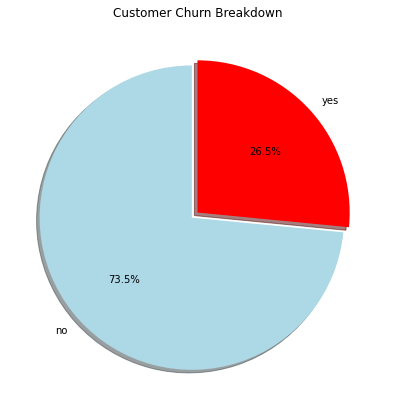

In [81]:
# Data to plot
labels = df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

### EXPLORING THE DIFFERENT FEAUTURES OF THE DATA SET AND TRYING TO UNDERSTAND HOW THEY RELATE TO A CUSTOMER CHURNING

### CHURN CUSTOMER BY GENDER

##### The churn rates for both male and female custimers is similar and gender difference doesn't really explain why customers churn

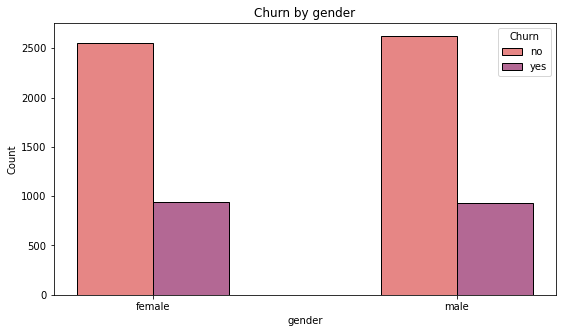

In [82]:
#####
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="gender", hue="Churn", multiple="dodge", palette ='flare',shrink=.5)
plt.title('Churn by gender')
plt.show()

### CHURN CUSTOMER BY SENIOR CITIZEN

####     
    ~It is noticed that most of our customers are NOT SENIOR CItizens and customers who are senior citizens have a relative more churn percentage than customers who are not senior citizens

Text(0.5, 1.0, 'Churn by SeniorCitizen')

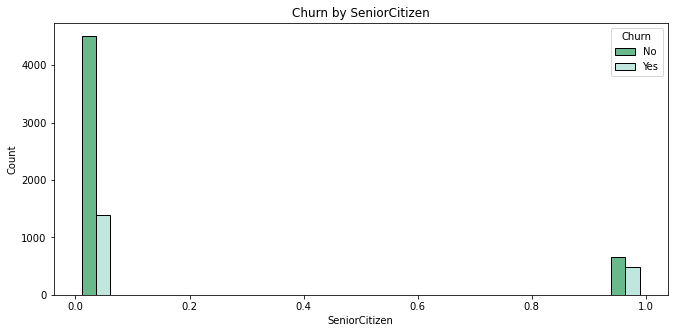

In [18]:
plt.figure(figsize=(11,5))
sns.histplot(data=df, x="SeniorCitizen", hue="Churn", multiple="dodge", palette ='BuGn_r',shrink=.7)
plt.title('Churn by SeniorCitizen')

### CUSTOMER CHURN BY PARTNER

#### 
    ~Customers with partners are more than customers without partners
    ~Customers with partners are less likely to churn reelative to those without partners

Text(0.5, 1.0, 'Churn by Partner')

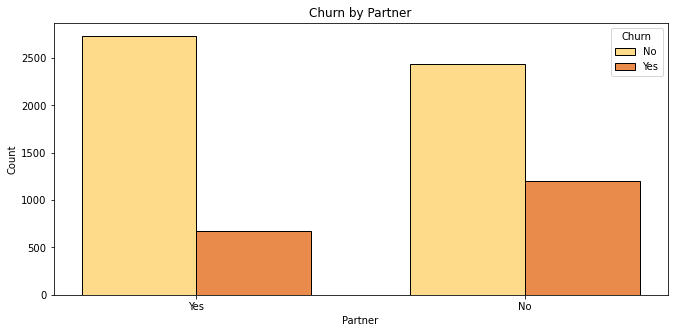

In [20]:
plt.figure(figsize=(11,5))
sns.histplot(data=df, x="Partner", hue="Churn", multiple="dodge", palette ='YlOrBr',shrink=.7)
plt.title('Churn by Partner')

### Dependents variable
    ~the Dependents feature is a binarry variable that tell wether the cutomer is a depandent or not. and we can see that most customers aren't dependent while churn is fairly present in both types.

Text(0.5, 1.0, 'Dependents feature')

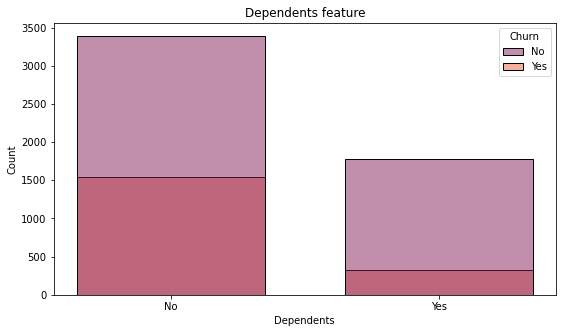

In [8]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Dependents",hue='Churn',shrink = .7 ,  palette='rocket' )
plt.title('Dependents feature')

### Tenure Feature
    ~looking at the figures below we can tell that the less tenure the customer has the more likely he is about to churn.

Text(0.5, 1.0, 'Tenure feature')

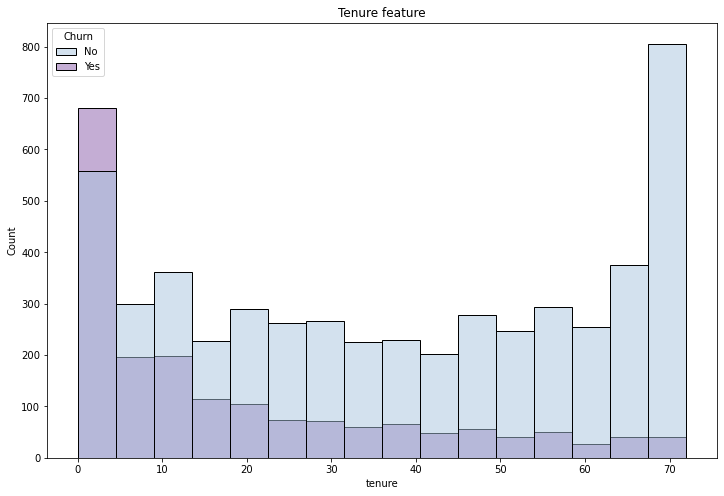

In [25]:

plt.figure(figsize=(12,8))
sns.histplot(data=df,x="tenure",hue='Churn' , palette='BuPu')
plt.title('Tenure feature')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


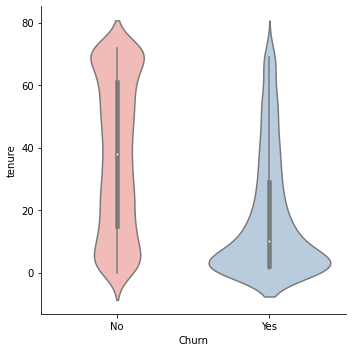

In [34]:
#Lets do a  swarmplot
g = sns.factorplot(x="Churn", y = "tenure",data = df, kind="violin", palette = "Pastel1")

### Telecom services
    ~Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.The figures below shows the distribution of each service and how it affects shurn ( we can't make conclusion here since we are just exploring the dataset).

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

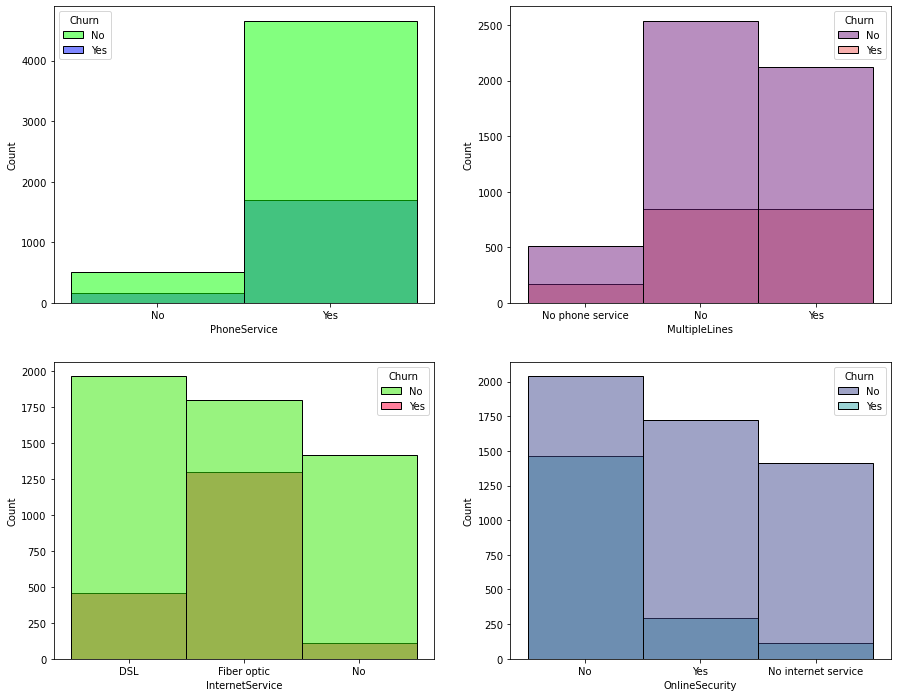

In [28]:

fig, ax = plt.subplots(2, 2,figsize=(15,12))
sns.histplot(data=df,x="PhoneService",hue='Churn', palette='hsv',ax=ax[0,0])
sns.histplot(data=df,x="MultipleLines",hue='Churn', palette='magma',ax=ax[0,1])
sns.histplot(data=df,x="InternetService",hue='Churn', palette='prism',ax=ax[1,0])
sns.histplot(data=df,x='OnlineSecurity',hue='Churn', palette='mako',ax=ax[1,1])

<AxesSubplot:xlabel='StreamingTV', ylabel='Count'>

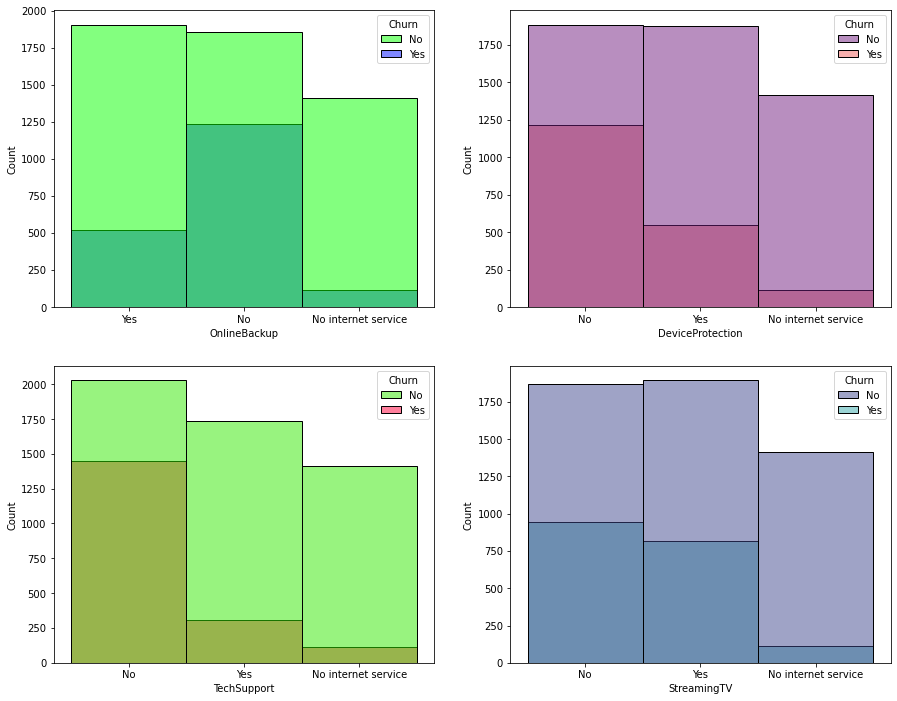

In [30]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
sns.histplot(data=df,x="OnlineBackup",hue='Churn', palette='hsv',ax=ax[0,0])
sns.histplot(data=df,x="DeviceProtection",hue='Churn', palette='magma',ax=ax[0,1])
sns.histplot(data=df,x="TechSupport",hue='Churn', palette='prism',ax=ax[1,0])
sns.histplot(data=df,x='StreamingTV',hue='Churn', palette='mako',ax=ax[1,1])

### MONTHLY CHARGES VS CHURN

#### 
    ~From the visualisations below it is noticed that the more customers PAY monthly for charges, the more the likelihood of them churning 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


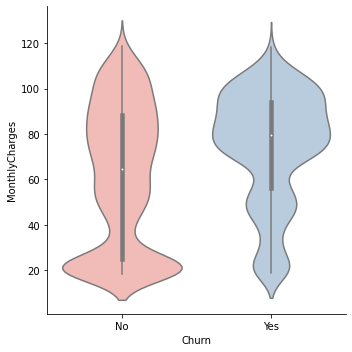

In [33]:
# Create a Volin Plot showing how monthy charges relate to Churn
# We an see that Churned customers tend to be higher paying customers
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = df, kind="violin", palette = "Pastel1")

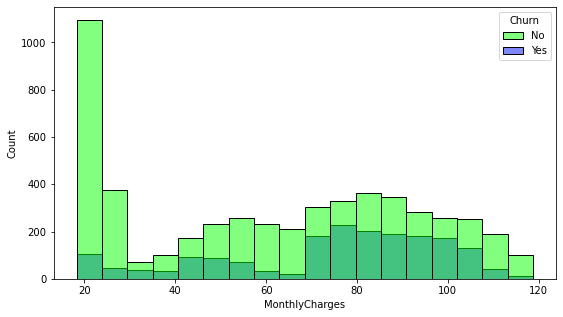

In [11]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="MonthlyCharges", palette='hsv',hue='Churn');

### MODELLING

##### FINDING THE CORRELATION WITHIN OUR DATA SET

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


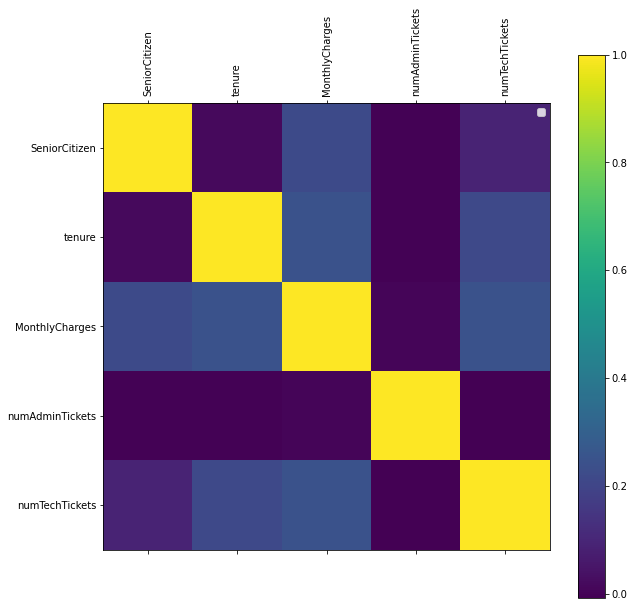

In [36]:

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

#### 
    ~It is noticed that some feautures are still seen to be categorical features so the whole correlation couldnt be show, would convert them to numeric features so that we can check extensively how houch correltion and if theres multi collinearity

In [124]:
df3 = df.copy()
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df3[item].replace(to_replace='yes', value=1, inplace=True)
    df3[item].replace(to_replace='no',  value=0, inplace=True)
#df3.head()

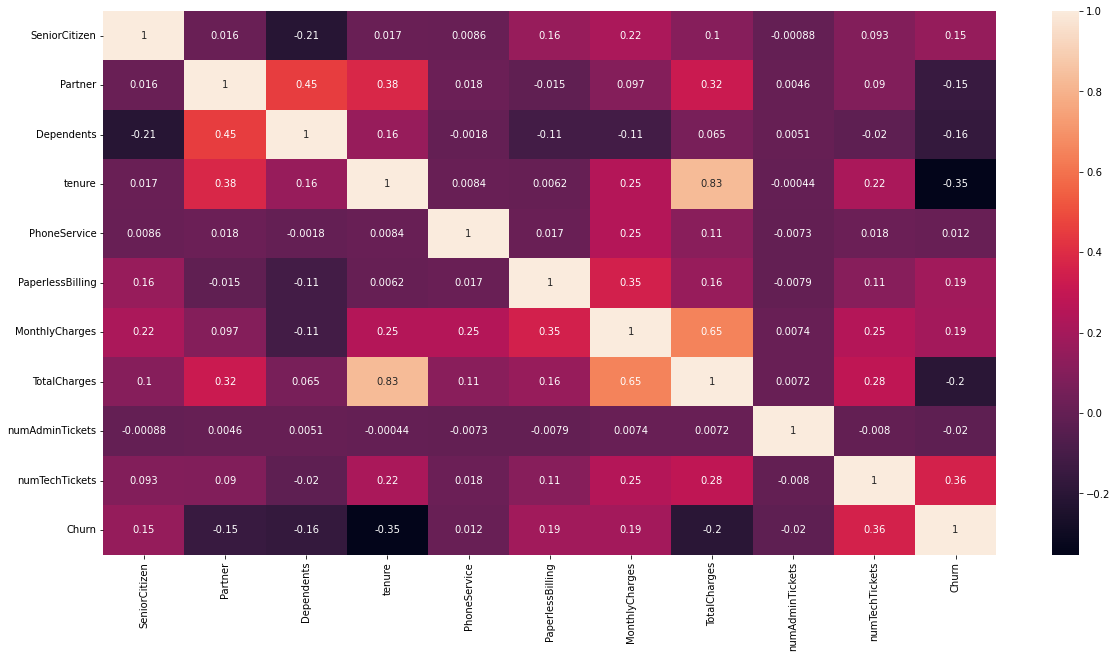

In [87]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df3,show_chart=True)

In [90]:
try:
    customer_id = df3['customerID'] # Store this as customer_id variable
    del df3['customerID'] # Don't need in ML DF
except:
    print("already removed customerID")

In [91]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,female,0,1,0,1,0,no phone service,dsl,no,yes,...,no,no,month-to-month,1,electronic check,29.85,29.85,0,0,0
1,male,0,0,0,34,1,no,dsl,yes,no,...,no,no,one year,0,mailed check,56.95,1889.50,0,0,0
2,male,0,0,0,2,1,no,dsl,yes,yes,...,no,no,month-to-month,1,mailed check,53.85,108.15,0,0,1
3,male,0,0,0,45,0,no phone service,dsl,yes,no,...,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0,3,0
4,female,0,0,0,2,1,no,fiber optic,no,no,...,no,no,month-to-month,1,electronic check,70.70,151.65,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,1,1,24,1,yes,dsl,yes,no,...,yes,yes,one year,1,mailed check,84.80,1990.50,0,0,0
7039,female,0,1,1,72,1,yes,fiber optic,no,yes,...,yes,yes,one year,1,credit card (automatic),103.20,7362.90,0,5,0
7040,female,0,1,1,11,0,no phone service,dsl,yes,no,...,no,no,month-to-month,1,electronic check,29.60,346.45,0,0,0
7041,male,1,1,0,4,1,yes,fiber optic,no,no,...,no,no,month-to-month,1,mailed check,74.40,306.60,0,0,1


##### Use one-hot encoding to convert categorical data to binary (0 or 1)

In [92]:
ml_dummies = pd.get_dummies(df3)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,3,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,0,1,0,0,0,0,1,0


#### Checking the correlations after One-Hot encoding

In [94]:
show_correlations(ml_dummies, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_month-to-month                    0.405103
numTechTickets                             0.357283
OnlineSecurity_no                          0.342637
TechSupport_no                             0.337281
InternetService_fiber optic                0.308020
PaymentMethod_electronic check             0.301919
OnlineBackup_no                            0.268005
DeviceProtection_no                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_no                         0.130845
StreamingTV_no                             0.128916
StreamingTV_yes                            0.063228
StreamingMovies_yes                        0.061382
MultipleLines_yes                          0.040102
PhoneService                               0.011942
gender_female                              0.008612
gender_male 

<Figure size 1440x720 with 0 Axes>

In [95]:
try:
    label = ml_dummies['Churn'] # Remove the label before training the model
    del ml_dummies['Churn']
except:
    print("label already removed.")

##### Training our model

KNeighborsClassifier
0.768 
 - - - - -  

DecisionTreeClassifier
0.847 
 - - - - -  

XGBClassifier
0.848 
 - - - - -  



<AxesSubplot:ylabel='features'>

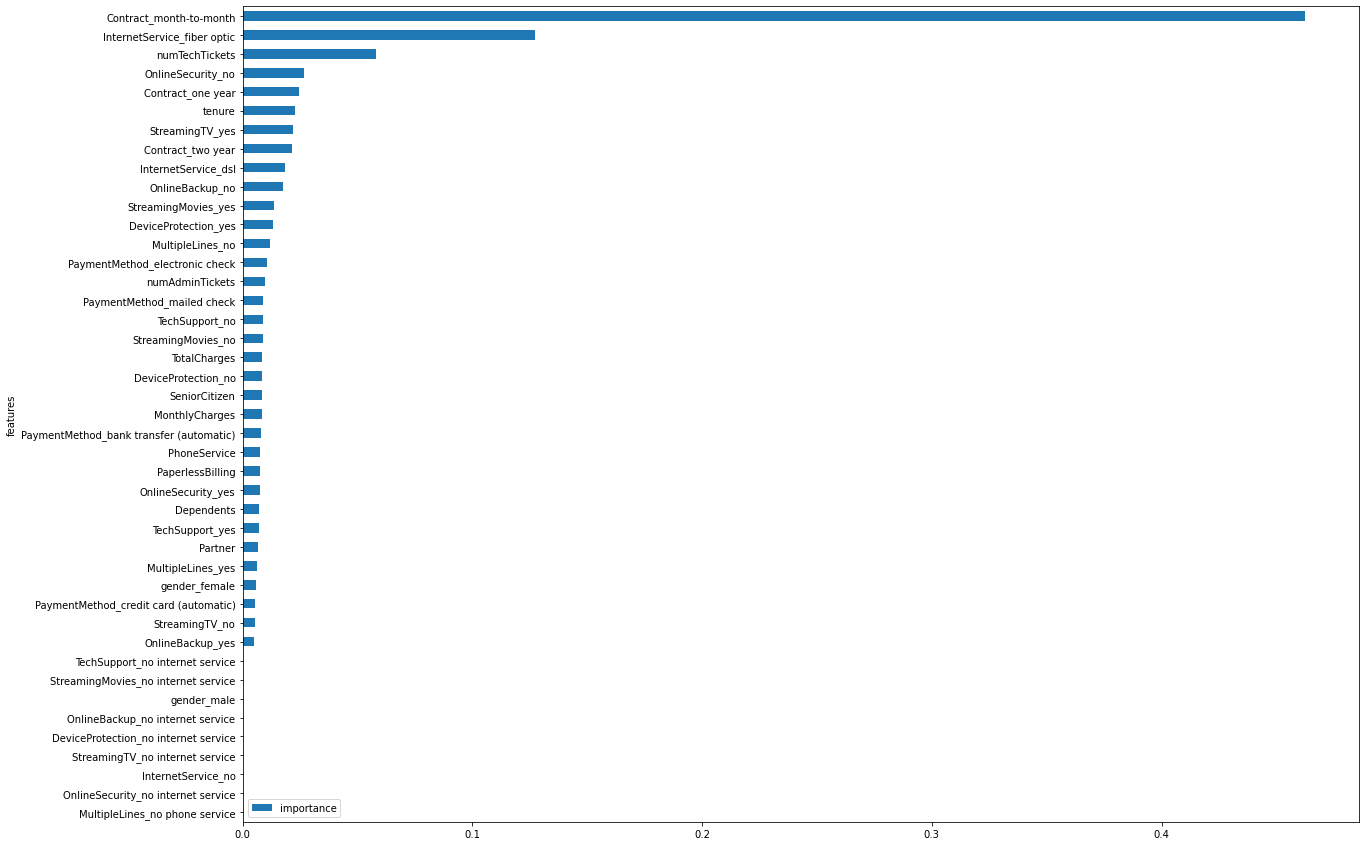

In [135]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5),
    XGBClassifier(random_state = 42)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

### Our best model is XGB Classifier

In [125]:
# Preprocessing original dataframe
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    #ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['Churn']
        del ml_dummies['Churn']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df3)

In [127]:
output_df = original_df[0].copy()
#output_df['---randomColumn---']
output_df['prediction'] = clf.predict_proba(output_df)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TotalCharges_ 
Feature names seen at fit time, yet now missing:
- TotalCharges

  warnings.warn(message, FutureWarning)


In [128]:
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.44
Mean predict proba of NON-churn: 0.29


### From our predictions, this next dataframe helps us  target the customers who haven't churned but are likely to.

In [130]:
activate = output_df[output_df['churn'] == 0]
activate[['customerID','churn','prediction']]

,customerID,churn,prediction
0,7590-vhveg,0,0.737374
1,5575-gnvde,0,0.030822
3,7795-cfocw,0,0.030822
6,1452-kiovk,0,0.026455
7,6713-okomc,0,0.737374
...,...,...,...
7037,2569-wgero,0,0.014493
7038,6840-resvb,0,0.030822
7039,2234-xaduh,0,0.948357
7040,4801-jzazl,0,0.737374
